In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy

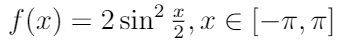

In [257]:
n=12
func = lambda x: 2*(np.sin(x/2))**2
X=np.linspace(-np.pi, np.pi, n)
Y=func(X)
X6=np.linspace(-np.pi, np.pi, 6*n)
df=pd.DataFrame({'x':[i for i in X], 'f(x)':[j for j in Y]})
df#.set_index('x')

,x,f(x)
0,-3.141593,2.000000
1,-2.570394,1.841254
2,-1.999195,1.415415
3,-1.427997,0.857685
4,-0.856798,0.345139
5,-0.285599,0.040507
6,0.285599,0.040507
7,0.856798,0.345139
8,1.427997,0.857685
9,1.999195,1.415415


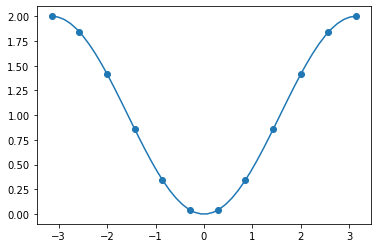

In [113]:
x=np.linspace(-np.pi, np.pi)
plt.plot(x, func(x))
plt.scatter(X, Y)
plt.show()

Інтерполяційний поліном Лагранжа:

In [186]:
lagr=scipy.interpolate.lagrange(df['x'], df['f(x)'])
print('L(x) =\n', lagr)

L(x) =
             11             10             9             8            7
-3.456e-19 x  + 2.307e-07 x  - 2.472e-17 x - 2.444e-05 x + 9.91e-17 x
             6             5           4             3       2
 + 0.001388 x + 6.219e-16 x - 0.04166 x - 1.153e-15 x + 0.5 x + 2.193e-17 x + 5.844e-08


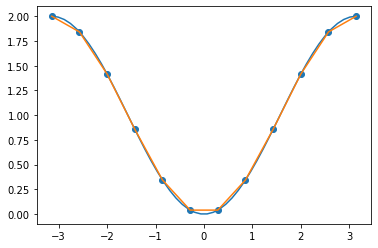

In [185]:
plt.plot(x, func(x))
plt.plot(X, lagr(X))
plt.scatter(X, Y)
plt.show()

In [ ]:
def mistakes(fun):
    res=[]
    for j in range(1, len(df['x'])):
        for i in X6:
            if i<df['x'][j] and i>df['x'][j-1]:
                res.append(abs(func(i)-fun(i))) 
    print(res)
    plt.plot(X6[1:][:-1], res)
    plt.show()

Графік помилки поліному Лагранжа:

[7.979847653993843e-06, 9.351456016659654e-06, 7.672069103792367e-06, 5.025942486414081e-06, 2.515678386938447e-06, 6.201518474302503e-07, 5.51752655564286e-07, 1.087392291987399e-06, 1.156784910305575e-06, 9.43173724898827e-07, 6.049781275940802e-07, 2.591477914481999e-07, 2.1725294230279246e-08, 2.0423856783580163e-07, 2.8506327409694165e-07, 2.8070690816228705e-07, 2.1796629434689407e-07, 1.2610490152109577e-07, 3.1208671535942756e-08, 4.7236755507107375e-08, 9.77771956733875e-08, 1.1681979794619934e-07, 1.0732442234928641e-07, 7.682506852901838e-08, 3.5207852966401276e-08, 7.401523616223926e-09, 4.237903056258929e-08, 6.38077637948875e-08, 6.907721564197722e-08, 5.8889877516121736e-08, 3.6757297636191844e-08, 8.117792049677774e-09, 2.0761980603495322e-08, 4.392944384472297e-08, 5.676926549788748e-08, 5.6769265499839044e-08, 4.3929443846457694e-08, 2.076198059655643e-08, 8.117792091311138e-09, 3.6757297761091934e-08, 5.8889877710410765e-08, 6.90772160027997e-08, 6.380776432224344e-0

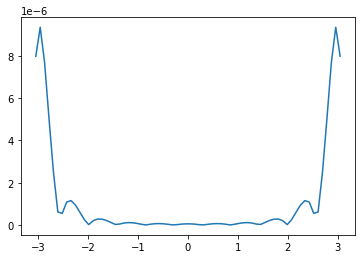

In [224]:
mistakes(lagr)

Інтерполяційний поліном Ньютона:

In [225]:
def sep_dif(x, y):
    table=np.zeros([len(y), len(y)])
    table[:, 0]=y
    for i in range(1, len(y)):
        for j in range(len(y)-i):
            table[j][i]=(table[j+1][i-1]-table[j][i-1])/(x[j+i]-x[j])
    return table[0, :]

def newton_poly(coefs, x, point): 
    p=coefs[len(x)-1]
    for i in range(1, len(x)):
        p=coefs[len(x)-i-1]+(point-x[len(x)-i-1])*p
    return p

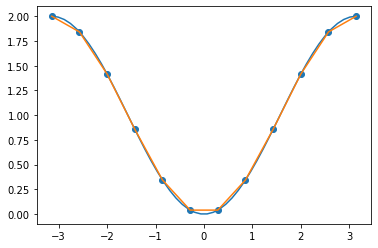

In [201]:
newton=np.poly1d(newton_poly(sep_dif(X, Y), X, X))
plt.plot(x, func(x))
plt.scatter(X, Y)
plt.plot(X, newton)
plt.show()

Графік помилки поліному Ньютона:

[0.0, 7.979847942873874e-06, 9.351456179862438e-06, 7.672069179731622e-06, 5.025942505065828e-06, 2.5156783698410123e-06, 6.201518099047121e-07, 5.517527024156976e-07, 1.0873923410592568e-06, 1.1567849576010758e-06, 9.431737668652573e-07, 6.049781637873508e-07, 2.5914782120217694e-07, 2.172527091559573e-08, 2.0423855007223324e-07, 2.8506326099630996e-07, 2.8070689928050285e-07, 2.1796628879577895e-07, 1.261048981904267e-07, 3.120866998163052e-08, 4.723675606221889e-08, 9.777719556236519e-08, 1.1681979739108783e-07, 1.0732442135008569e-07, 7.682506775186226e-08, 3.5207851967200554e-08, 7.401524337868892e-09, 4.23790308956562e-08, 6.38077643777546e-08, 6.907721575299952e-08, 5.888987772428855e-08, 3.6757297622314056e-08, 8.117791959472154e-09, 2.0761980534106383e-08, 4.3929444111870386e-08, 5.676926529665956e-08, 5.676926529665956e-08, 4.392944388982578e-08, 2.0761980978195593e-08, 8.117792403561364e-09, 3.675729789986981e-08, 5.888987750224395e-08, 6.907721641913334e-08, 6.3807764377754

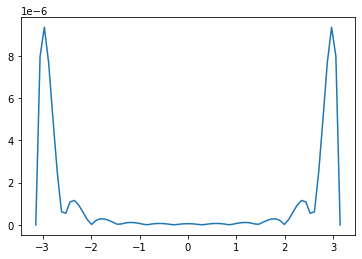

In [259]:
plt.plot(X6, abs(newton_poly(sep_dif(X, Y), X, X6)-func(X6)))
print([i for i in abs(newton_poly(sep_dif(X, Y), X, X6)-func(X6))])
plt.show()

Інтерполяція сплайнами:

In [204]:
a = [i for i in df['f(x)'][:-1]]
y = [i for i in df['f(x)']]
h = [df['x'][i+1]-df['x'][i] for i in range(len(df)-1)]

In [205]:
def Thomas_method(mat, v):
    n=len(mat)
    p, q = [0]*n, [0]*n
    p[0] = -mat[0][1]/mat[0][0]
    q[0] = -(-v[0]/mat[0][0])
    for i in range(1, n-1):
        p[i] = mat[i][i+1]/(-mat[i][i]-mat[i][i-1]*p[i-1])
        q[i] = (mat[i][i-1]*q[i-1] - v[i])/(-mat[i][i] - mat[i][i-1]*p[i-1])
    x = [0]*n
    x[n-1] = (mat[-1][n-2]*q[n-2]-v[-1])/(-mat[-1][-1]-mat[-1][n-2]*p[n-2])
    for i in reversed(range(n-1)):
        x[i]=p[i]*x[i+1]+q[i]
    return x

In [206]:
def cubic_spline(f, r):
    A=np.eye((len(df)-1))
    n=len(A)
    for i in range(1, n-1):
       A[i][i] = 2*(r[i] + r[i+1])
    for i in range(1, n-1):
       A[i][i-1] = r[i-1]
    for i in range(1, n-1):
       A[i][i+1] = r[i+1]
    w = [3*((f[i]-f[i-1])/r[i]-(f[i-1]-f[i-2])/r[i-1]) for i in range(2, n)]
    w.append(0.0)
    w.insert(0, 0.0)
    c = Thomas_method(A, w)
    d = [(c[i+1] - c[i])/(3*r[i-1]) for i in range(n-1)]
    d.append(-c[n-1]/(3*r[n-1]))
    b = [(f[i+1]-f[i])/r[i] - ((c[i+1]+2*c[i])*r[i])/3 for i in range(n-1)]
    b.append((f[n]-f[n-1])/r[n-1] - (2*c[n-1]*r[n-1])/3)
    return b, c, d
bb, cc, dd = cubic_spline(y, h)

In [212]:
def spline(dot):
    for i in range(len(df['x'])):
        if df['x'][i]>dot:
            x0=df['x'][i-1]
            j=i-1
            break
    f = lambda x: a[j]+bb[j]*(x-x0)+cc[j]*(x-x0)**2 + dd[j]*(x-x0)**3
    return f(dot)

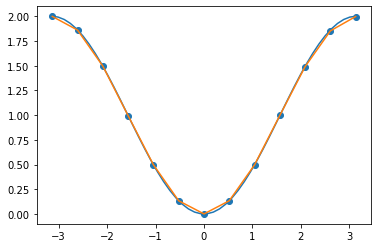

In [213]:
X2=np.linspace(-np.pi+0.01, np.pi-0.01, n+1)
Y2=[spline(i) for i in X2]
x=np.linspace(-np.pi, np.pi)
plt.plot(x, func(x))
plt.plot(X2, Y2)
plt.scatter(X2, Y2)
plt.show()

Графік помилки інтерполяції сплайнами:

[0.0017890650882499415, 0.0024509190130075353, 0.0023544357768223723, 0.0018081944179417775, 0.0010616680923773991, 0.0003068757396371691, 0.0003195165943961076, 0.0007336612231478856, 0.0009015809097543404, 0.0008358306535838356, 0.0005917952989171749, 0.0002636519420178285, 2.0003023773140782e-05, 0.0001554872306057664, 0.00018121186156450086, 0.0001473922256907123, 8.948391544905121e-05, 3.3494491434082896e-05, 1.3691107328961394e-06, 1.2963233411822372e-05, 5.0102808599739035e-05, 7.540570406250335e-05, 6.822184931343234e-05, 3.0399074722464725e-05, 8.769871739200408e-06, 1.1931539867060525e-05, 0.00012181217782281095, 0.00023002249495443494, 0.0002673504494519474, 0.0002128325668956238, 9.690008115267879e-05, 4.122841998473181e-06, 5.1100869748750555e-05, 0.00018322795269195766, 0.0002798874412686572, 0.0002798874412686559, 0.0001832279526919542, 5.1100869748747085e-05, 4.12284199848012e-06, 9.690008115270654e-05, 0.00021283256689565155, 0.0002673504494519474, 0.000230022494954462

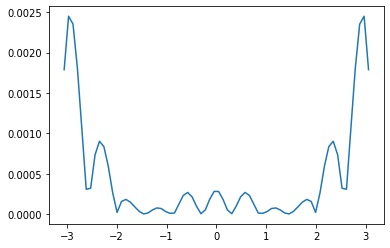

In [216]:
mistakes(spline)

Теоретичнe значення похибки:

In [255]:
f_df3=lambda x: -2*np.sin(x/2)*np.cos(x/2)
M3=max(f_df3(X6), key=abs)
h=df['x'][1]-df['x'][0]
print('Δ < ', (5*M3*(h**3)/2))

Δ <  0.4657954728999603
